In [ ]:
import requests
from bs4 import BeautifulSoup
import zipfile
import io
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import time
def load_data():
    page_url = 'https://archive.ics.uci.edu/dataset/240/human+activity+recognition+using+smartphones'
    page_response = requests.get(page_url)
    if page_response.status_code == 200:
        soup = BeautifulSoup(page_response.content, 'html.parser')
        download_link = soup.select_one('a[href$=".zip"]')['href']
        full_download_url = 'https://archive.ics.uci.edu' + download_link
        response = requests.get(full_download_url)
        if response.status_code == 200:
            with zipfile.ZipFile(io.BytesIO(response.content)) as outer_zip:
                inner_zip_name = 'UCI HAR Dataset.zip'
                with outer_zip.open(inner_zip_name) as inner_zip_file:
                    with zipfile.ZipFile(io.BytesIO(inner_zip_file.read())) as inner_zip:
                        with inner_zip.open('UCI HAR Dataset/train/X_train.txt') as myfile:
                            df = pd.read_csv(myfile, delim_whitespace=True, header=None)
                        with inner_zip.open('UCI HAR Dataset/train/y_train.txt') as myfile_y:
                            y = pd.read_csv(myfile_y, delim_whitespace=True, header=None)
    else:
        raise Exception("Failed to download or parse the dataset.")
    return df, y

<ipython-input-2-0e62b3c5d430>:28: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(myfile, delim_whitespace=True, header=None)
<ipython-input-2-0e62b3c5d430>:30: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y = pd.read_csv(myfile_y, delim_whitespace=True, header=None)


Feature dataset shape: (7352, 561)
Target dataset shape: (7352, 1)
First few rows of features:
        0         1         2         3         4         5         6    \
0  0.288585 -0.020294 -0.132905 -0.995279 -0.983111 -0.913526 -0.995112   
1  0.278419 -0.016411 -0.123520 -0.998245 -0.975300 -0.960322 -0.998807   
2  0.279653 -0.019467 -0.113462 -0.995380 -0.967187 -0.978944 -0.996520   
3  0.279174 -0.026201 -0.123283 -0.996091 -0.983403 -0.990675 -0.997099   
4  0.276629 -0.016570 -0.115362 -0.998139 -0.980817 -0.990482 -0.998321   

        7         8         9    ...       551       552       553       554  \
0 -0.983185 -0.923527 -0.934724  ... -0.074323 -0.298676 -0.710304 -0.112754   
1 -0.974914 -0.957686 -0.943068  ...  0.158075 -0.595051 -0.861499  0.053477   
2 -0.963668 -0.977469 -0.938692  ...  0.414503 -0.390748 -0.760104 -0.118559   
3 -0.982750 -0.989302 -0.938692  ...  0.404573 -0.117290 -0.482845 -0.036788   
4 -0.979672 -0.990441 -0.942469  ...  0.087753 -0.3514

<ipython-input-5-266ffa6abe2e>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y[0], palette="viridis")


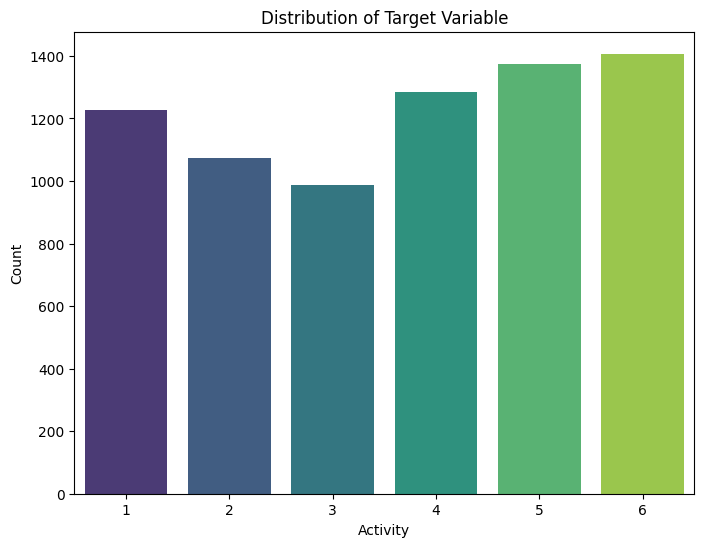

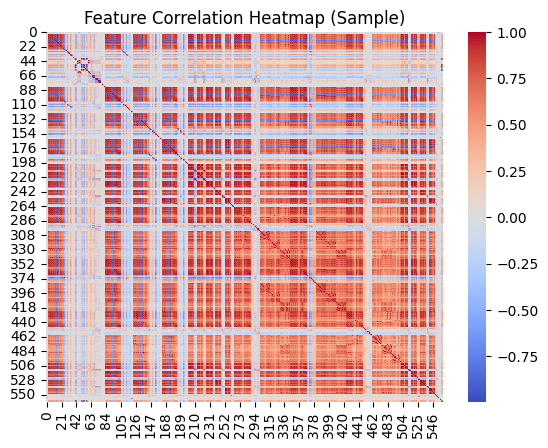

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
import numpy as np
import time

# Load dataset
df, y = load_data()
import matplotlib.pyplot as plt
import seaborn as sns

# Display basic info about the dataset
print("Feature dataset shape:", df.shape)
print("Target dataset shape:", y.shape)

# Display the first few rows of the feature dataset
print("First few rows of features:")
print(df.head())

# Display the first few rows of the target dataset
print("First few rows of target:")
print(y.head())

# Check for missing values
print("\nMissing values in the feature dataset:\n", df.isnull().sum().sum())
print("Missing values in the target dataset:\n", y.isnull().sum().sum())

# Summary statistics of the features
print("\nSummary statistics of features:")
print(df.describe())

# Plot the target variable distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=y[0], palette="viridis")
plt.title("Distribution of Target Variable")
plt.xlabel("Activity")
plt.ylabel("Count")
plt.show()

# Check correlations among features (if feasible with a subset)
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', cbar=True)
plt.title("Feature Correlation Heatmap (Sample)")
plt.show()



In [ ]:
label_encoder = LabelEncoder()
encoded_y = label_encoder.fit_transform(y.values.ravel())#ravel converts 2 dimentional matrix into 1 dimentional matrix
print(encoded_y)

[4 4 4 ... 1 1 1]


In [ ]:

# YOUR CODE HERE: Apply StandardScaler to df

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [ ]:
X_train_full, X_test_full, y_train, y_test = train_test_split(df_scaled, encoded_y, test_size=0.2,random_state=42)

In [ ]:
from sklearn.naive_bayes import GaussianNB
pipeline = Pipeline([
    ('classifier', GaussianNB())])
# TASK 5 - 2. Fit the model to the training data
pipeline.fit(X_train_full, y_train)
# TASK 5 - 3. Predict values for test set
y_pred = pipeline.predict(X_test_full)
# TASK 5 - 4. Print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.73


In [ ]:
start_time = time.time()
# Create a pipeline using Gaussian Naive Bayes
pipeline = Pipeline([
    ('classifier', GaussianNB())])
# Fit the model to the training data
pipeline.fit(X_train_full, y_train)
# Predict values for test set
y_pred = pipeline.predict(X_test_full)
# TASK 6 - 2. Note the end time
end_time = time.time()
# Report the difference as the time taken
time_taken = end_time - start_time
print(f"Time taken for model training and inference: {time_taken:.2f} seconds")
# Print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Time taken for model training and inference: 0.06 seconds
Accuracy: 0.73


In [37]:

n_clusters = 5  # Define the number of clusters (adjust based on your dataset)
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
# Transpose the dataset to treat features as data points for clustering
kmeans.fit(df_scaled.T)
# Get the indices of the cluster centers
selected_features_indices =np.argmin(kmeans.transform(df_scaled.T), axis=1)

# Select features based on the indices
selected_features = df.iloc[:, selected_features_indices]
print(selected_features)

             2         2         2         1         1         1         1  \
0    -0.132905 -0.132905 -0.132905 -0.020294 -0.020294 -0.020294 -0.020294   
1    -0.123520 -0.123520 -0.123520 -0.016411 -0.016411 -0.016411 -0.016411   
2    -0.113462 -0.113462 -0.113462 -0.019467 -0.019467 -0.019467 -0.019467   
3    -0.123283 -0.123283 -0.123283 -0.026201 -0.026201 -0.026201 -0.026201   
4    -0.115362 -0.115362 -0.115362 -0.016570 -0.016570 -0.016570 -0.016570   
...        ...       ...       ...       ...       ...       ...       ...   
7347 -0.181233 -0.181233 -0.181233 -0.057193 -0.057193 -0.057193 -0.057193   
7348 -0.147468 -0.147468 -0.147468 -0.007749 -0.007749 -0.007749 -0.007749   
7349 -0.045022 -0.045022 -0.045022 -0.017011 -0.017011 -0.017011 -0.017011   
7350 -0.158281 -0.158281 -0.158281 -0.018843 -0.018843 -0.018843 -0.018843   
7351 -0.203867 -0.203867 -0.203867 -0.012423 -0.012423 -0.012423 -0.012423   

             1         1         1  ...         4         2    

In [38]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import time

# Assuming X_train_full, X_test_full, y_train, and y_test are already defined

# Step 1: Initialize the GaussianNB model
model = GaussianNB()

# Step 2: Train the model and record the time taken
start_time = time.time()
model.fit(X_train_full, y_train)
training_time = time.time() - start_time

# Step 3: Predict on the test set
y_pred = model.predict(X_test_full)

# Step 4: Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Step 5: Print the results
print(f"Training Time: {training_time:.4f} seconds")
print(f"Accuracy: {accuracy:.4f}")


Training Time: 0.0445 seconds
Accuracy: 0.7315
